In [20]:
import phoebe
from phoebe import u, c

import numpy as np

import os
import sys
from pathlib import Path
baseModulePath = str(Path(os.getcwd()).parents[2].absolute())
if baseModulePath not in sys.path:
	sys.path.append(baseModulePath)

import importlib
import analisis.phoebe_model.utils as gen_utils
import analisis.phoebe_model.optimizers.opt_utils as opt_utils
importlib.reload(gen_utils)
importlib.reload(opt_utils)

logger = phoebe.logger(clevel='WARNING')

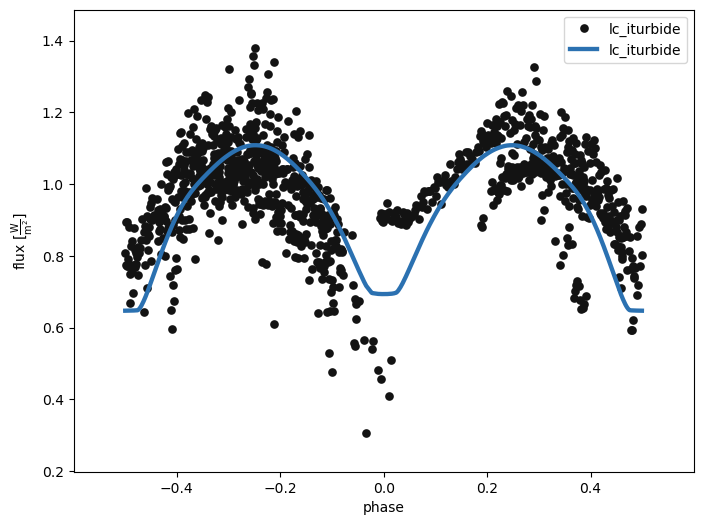

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [25]:
b = phoebe.load("../estimations/bundle-saves/rotsei1-estimates")
b.plot(x='phase', dataset='lc_iturbide', show=True, legend=True, marker={'lc_iturbide@dataset': '.'})

In [24]:
print(b['requiv'])
print(b['sma@binary'])
print(b['requivsumfrac'])
print(b['requivratio'])

ParameterSet: 4 parameters
C        requiv@primary@component: 1.6410086487444842 solRad
C      requiv@secondary@component: 1.0401643607916269 solRad
        requiv@primary@constraint: pot_to_requiv_contact({pot@contact_envelope@component}, {q@binary@component}, {sma@binary@component}, 1)
      requiv@secondary@constraint: pot_to_requiv_contact({pot@contact_envelope@component}, {q@binary@component}, {sma@binary@component}, 2)
ParameterSet: 2 parameters
C            sma@binary@component: 3.35 solRad
            sma@binary@constraint: ({requiv@primary@component} + {requiv@secondary@component}) / {requivsumfrac@binary@component}
Parameter: requivsumfrac@binary@component
                       Qualifier: requivsumfrac
                     Description: sum of fractional equivalent radii of children stars
                           Value: 0.8003501521003316
                  Constrained by: 
                      Constrains: requivratio@binary@component
                      Related to: requi

In [23]:
b.flip_constraint(qualifier='requivsumfrac', solve_for='sma@binary')

<ConstraintParameter: {sma@binary@component} = ({requiv@primary@component} + {requiv@secondary@component}) / {requivsumfrac@binary@component} (solar units) => 3.35 solRad>

In [10]:
print(b['requiv'])
print(b['requivratio'])
print(b['pot'])

ParameterSet: 4 parameters
C        requiv@primary@component: 1.6410086487444842 solRad
C      requiv@secondary@component: 1.0401643607916269 solRad
        requiv@primary@constraint: pot_to_requiv_contact({pot@contact_envelope@component}, {q@binary@component}, {sma@binary@component}, 1)
      requiv@secondary@constraint: pot_to_requiv_contact({pot@contact_envelope@component}, {q@binary@component}, {sma@binary@component}, 2)
ParameterSet: 2 parameters
C    requivratio@binary@component: 0.6338567207354111
           requivratio@constraint: {requiv@secondary@component} / {requiv@primary@component}
Parameter: pot@contact_envelope@component
                       Qualifier: pot
                     Description: Potential of the envelope (from the primary component's reference)
                           Value: 2.52
                  Constrained by: 
                      Constrains: requiv@primary@component, requiv@secondary@component, fillout_factor@contact_envelope@component
            

In [11]:
b.flip_constraint(qualifier='requiv', component='primary', solve_for='pot')
b.flip_constraint(qualifier='requivratio', solve_for='requiv@primary')

<ConstraintParameter: {requiv@primary@component} = ({requivsumfrac@binary@component} * {sma@binary@component}) / ({requivratio@binary@component} + 1.000000) (solar units) => 1.6410086487444842 solRad>

In [15]:
print(b['teffratio'])
print(b['teff'])

ParameterSet: 2 parameters
C      teffratio@binary@component: 1.0398371104815864
             teffratio@constraint: {teff@secondary@component} / {teff@primary@component}
ParameterSet: 2 parameters
           teff@primary@component: 5648.0 K
         teff@secondary@component: 5873.0 K


In [17]:
b.flip_constraint(qualifier='teffratio', solve_for='teff@secondary')

<ConstraintParameter: {teff@secondary@component} = {teffratio@binary@component} * {teff@primary@component} (solar units) => 5873.0 K>

In [13]:
print(b['ecc'])
print(b['esinw'])
print(b['ecosw'])
print(b['per0@binary'])

Parameter: ecc@binary@component
                       Qualifier: ecc
                     Description: Eccentricity
                           Value: 0.0
                  Constrained by: 
                      Constrains: t0_perpass@binary@component, t0_ref@binary@component, ecosw@binary@component, esinw@binary@component
                      Related to: t0_supconj@binary@component, period@binary@component, per0@binary@component, dpdt@binary@component, dperdt@binary@component, t0@system, t0_perpass@binary@component, t0_ref@binary@component, ecosw@binary@component, esinw@binary@component

ParameterSet: 2 parameters
C          esinw@binary@component: 0.0
                 esinw@constraint: {ecc@binary@component} * (sin({per0@binary@component}))
ParameterSet: 2 parameters
C          ecosw@binary@component: 0.0
                 ecosw@constraint: {ecc@binary@component} * (cos({per0@binary@component}))
Parameter: per0@binary@component
                       Qualifier: per0
                 

In [18]:
b.flip_constraint(qualifier='esinw', solve_for='ecc')
b.flip_constraint(qualifier='ecosw', solve_for='per0')

Thu, 27 Jul 2023 17:17 BUNDLE       ERROR   Constraint 'ecc@binary@orbit@constraint' raised the following error while attempting to solve for 'ecc@binary@orbit@component'.  Consider flipping the constraint or changing the value of one of ['per0@binary@orbit@component', 'esinw@binary@orbit@component', 'ecosw@binary@orbit@component', 'ecc@binary@orbit@component'] until the constraint succeeds.  Original error: esinw=0.0 and per0=0.0 results in nan for ecc


<ConstraintParameter: {per0@binary@component} = arctan2({esinw@binary@component}, {ecosw@binary@component}) (solar units) => 0.0 deg>

In [19]:
gen_utils.resetAtmosphere(b)
opt_utils.optimize_params(b, ['incl@binary', 'requivratio', 'requivsumfrac', 'teffratio', 'esinw', 'ecosw'], 'phoebe_all', True, compute='phoebe01')

External Solver: ./external-jobs/optimizer.nelder_mead_opt_phoebe_all.py ./results/opt_phoebe_all_solution


('opt_phoebe_all', 'opt_phoebe_all_solution')

In [8]:
# gen_utils.resetAtmosphere(b)
# opt_utils.optimize_params(b, ['incl@binary'], 'rotsei1_incl', True, compute='phoebe01')
# opt_utils.optimize_params(b, ['incl@binary'], 'rotsei1_incl', False, maxiter=50, compute='phoebe01')

gen_utils.avoidAtmosphereErrors(b)
opt_utils.optimize_params(b, ['incl@binary'], 'rotsei1_incl_cutdown', export=True, datasets=['lc_iturbide_cutdown'], compute='fast_compute')
opt_utils.optimize_params(b, ['incl@binary'], 'rotsei1_incl', export=True, datasets=['lc_iturbide'], compute='fast_compute')
# opt_utils.optimize_params(b, ['incl@binary'], 'rotsei1_incl', False, maxiter=50, compute='fast_compute')

External Solver: ./external-jobs/optimizer.nelder_mead_opt_rotsei1_incl.py ./results/opt_rotsei1_incl_solution


('opt_rotsei1_incl', 'opt_rotsei1_incl_solution')

incl@binary@orbit@component = 110.21 deg


ParameterSet: 1 parameters
            incl@binary@component: 89.9849599456787 deg


Tue, 25 Jul 2023 14:47 PASSBANDS    WARNING Online passbands unavailable (reached max tries).  Pass refresh=True to force another attempt or repeat_errors=False to avoid showing this message.
100%|██████████| 605/605 [00:19<00:00, 30.73it/s]
Tue, 25 Jul 2023 14:48 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009677929419552158 for dataset='lc_iturbide_cutdown'


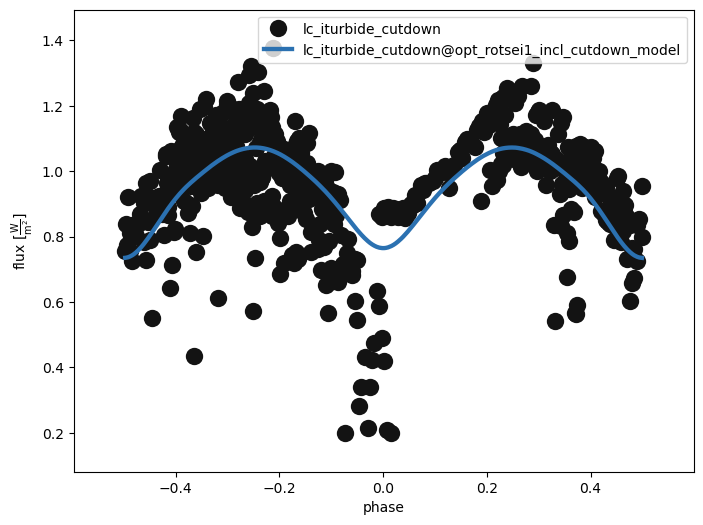

In [57]:
gen_utils.avoidAtmosphereErrors(b)
opt_utils.adopt_solution(b, 'rotsei1_incl_cutdown', "./external-jobs/results/opt_rotsei1_incl_cutdown_solution", compute='fast_compute')

incl@binary@orbit@component = 89.98 deg


ParameterSet: 1 parameters
            incl@binary@component: 84.35 deg


Tue, 25 Jul 2023 14:11 PASSBANDS    WARNING Online passbands unavailable (reached max tries).  Pass refresh=True to force another attempt or repeat_errors=False to avoid showing this message.
100%|██████████| 605/605 [00:20<00:00, 29.63it/s]


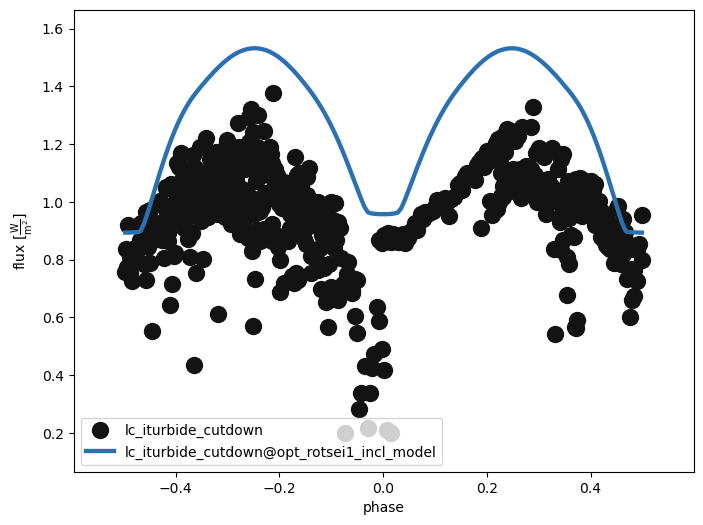

In [51]:
# gen_utils.resetAtmosphere(b)
# opt_utils.adopt_solution(b, 'rotsei1_incl', "./external-jobs/results/opt_rotsei1_incl_solution", compute='phoebe01')

# gen_utils.resetAtmosphere(b)
# opt_utils.adopt_solution(b, 'rotsei1_incl', compute='phoebe01')

gen_utils.avoidAtmosphereErrors(b)
opt_utils.adopt_solution(b, 'rotsei1_incl', compute='fast_compute')

In [18]:
gen_utils.resetAtmosphere(b)
opt_utils.optimize_params(b, ['t0_supconj', 'incl@binary'], 'rotsei1_t0_porb', True, compute='phoebe01')

Wed, 12 Jul 2023 23:47 PASSBANDS    WARNING Online passbands unavailable (reached max tries).  Pass refresh=True to force another attempt or repeat_errors=False to avoid showing this message.


External Solver: ./external-jobs/optimizer.nelder_mead_opt_t0_porb.py ./results/opt_t0_porb_solution


('opt_t0_porb', 'opt_t0_porb_solution')

t0_supconj@binary@orbit@component = -0.01 d
period@binary@orbit@component = 0.33 d
ParameterSet: 1 parameters
      t0_supconj@binary@component: -0.010003891004249452 d
ParameterSet: 1 parameters
          period@binary@component: 0.33325426939244684 d
Plotting


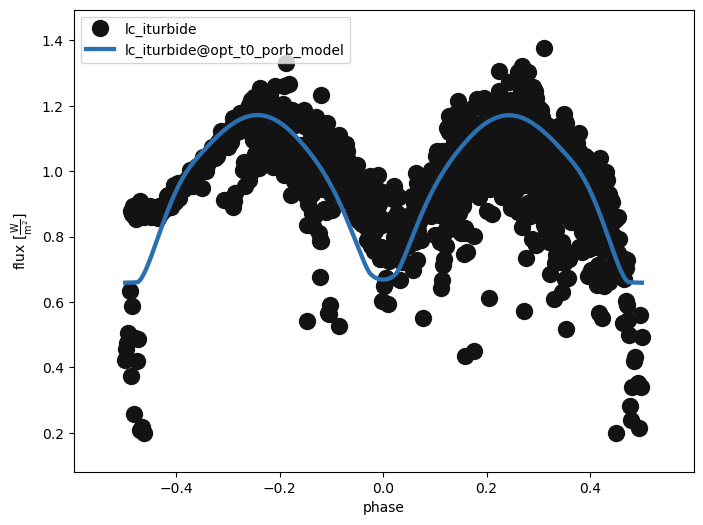

In [27]:
gen_utils.resetAtmosphere(b)
opt_utils.adopt_solution(b, 'rotsei1_t0_porb', "./external-jobs/results/opt_rotsei1_t0_porb_solution", compute='phoebe01')
# opt_utils.adopt_solution(b, 't0_porb', "./external-jobs/results/opt_rotsei1_t0_porb_solution", compute='phoebe01', run_compute=False)

In [6]:
print(b['requiv'])
print(b['sma'])
print(b['pot'])
print(b['requivratio'])
print(b['requivsumfrac'])

ParameterSet: 4 parameters
C        requiv@primary@component: 1.6410086487444842 solRad
C      requiv@secondary@component: 1.0401643607916269 solRad
        requiv@primary@constraint: pot_to_requiv_contact({pot@contact_envelope@component}, {q@binary@component}, {sma@binary@component}, 1)
      requiv@secondary@constraint: pot_to_requiv_contact({pot@contact_envelope@component}, {q@binary@component}, {sma@binary@component}, 2)
ParameterSet: 5 parameters
             sma@binary@component: 3.35 solRad
C           sma@primary@component: 0.8723401499841115 solRad
C         sma@secondary@component: 2.477659850015889 solRad
           sma@primary@constraint: {sma@binary@component} / ((1.000000 / {q@binary@component}) + 1.000000)
         sma@secondary@constraint: {sma@binary@component} / ({q@binary@component} + 1.000000)
Parameter: pot@contact_envelope@component
                       Qualifier: pot
                     Description: Potential of the envelope (from the primary component's refer

In [25]:
b.flip_constraint(qualifier='requiv', component='primary', solve_for='pot')
b.flip_constraint(qualifier='requivratio', solve_for='requiv@primary')

<ConstraintParameter: {requiv@primary@component} = ({requivsumfrac@binary@component} * {sma@binary@component}) / ({requivratio@binary@component} + 1.000000) (solar units) => 1.6410086487444842 solRad>

In [16]:
# testing if individual optimizations are better
gen_utils.resetAtmosphere(b)

# requivsumfrac keeps causing the super low secondary mass error
	# probably shouldn't try to change it too much, could try optimizing sma@binary instead later
print(opt_utils.optimize_params(b, ['requivsumfrac'], 'rotsei1_requivsumfrac', True, compute='phoebe01'))

# FAILED AGAIN WITH SAME MASS ERROR
print(opt_utils.optimize_params(b, ['requivratio'], 'rotsei1_requivratio', True, compute='phoebe01'))

External Solver: ./external-jobs/optimizer.nelder_mead_opt_rotsei1_requivsumfrac.py ./results/opt_rotsei1_requivsumfrac_solution
('opt_rotsei1_requivsumfrac', 'opt_rotsei1_requivsumfrac_solution')
External Solver: ./external-jobs/optimizer.nelder_mead_opt_rotsei1_requivratio.py ./results/opt_rotsei1_requivratio_solution
('opt_rotsei1_requivratio', 'opt_rotsei1_requivratio_solution')


Tue, 25 Jul 2023 12:18 BUNDLE       WARNING not all uniqueids in fitted_uniqueids@opt_rotsei1_requivsumfrac_solution@solution are still valid.  Falling back on twigs.  Save and load same bundle to prevent this extra cost.


requivsumfrac@binary@orbit@component = 0.80 


ParameterSet: 1 parameters
   requivsumfrac@binary@component: 0.7961271131202855


Tue, 25 Jul 2023 12:18 PASSBANDS    WARNING Online passbands unavailable (reached max tries).  Pass refresh=True to force another attempt or repeat_errors=False to avoid showing this message.
100%|██████████| 1193/1193 [01:31<00:00, 13.06it/s]
Tue, 25 Jul 2023 12:20 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009729575622188373 for dataset='lc_iturbide'


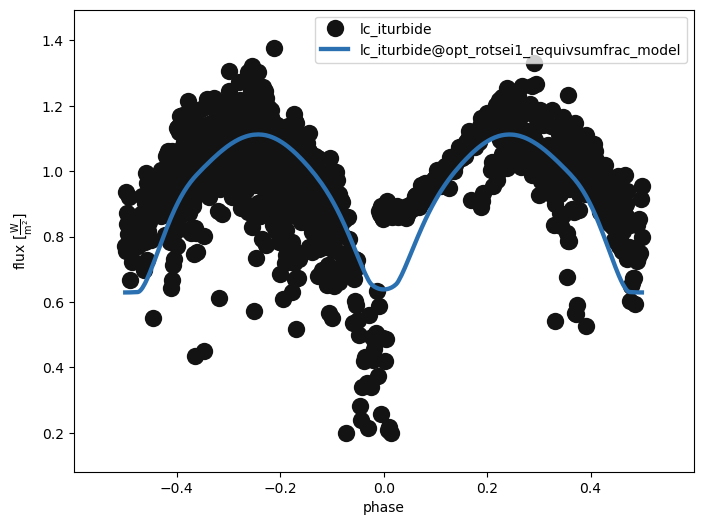

In [27]:
gen_utils.resetAtmosphere(b)
opt_utils.adopt_solution(b, 'rotsei1_requivsumfrac', "./external-jobs/results/opt_rotsei1_requivsumfrac_solution", compute='phoebe01')

In [21]:
gen_utils.saveBundle(b, "opt_rotsei1_requivsumfrac")

'bundle-saves/opt_rotsei1_requivsumfrac'

In [28]:
print(b['requivratio'])
print(b['requivsumfrac'])
print(b['sma@binary'])

Parameter: requivratio@binary@component
                       Qualifier: requivratio
                     Description: ratio between equivalent radii of children stars
                           Value: 0.6338567207354111
                  Constrained by: 
                      Constrains: None
                      Related to: requiv@primary@component, requiv@secondary@component, requivsumfrac@binary@component, sma@binary@component

Parameter: requivsumfrac@binary@component
                       Qualifier: requivsumfrac
                     Description: sum of fractional equivalent radii of children stars
                           Value: 0.7961271131202855
                  Constrained by: 
                      Constrains: None
                      Related to: requiv@primary@component, requiv@secondary@component, requivratio@binary@component, sma@binary@component

ParameterSet: 2 parameters
C            sma@binary@component: 0.0054715330566860836 solRad
            sma@binary@cons

In [24]:
# TODO: failing due to secondary mass somehow decreasing until ~0, try the different pblum_mode and see if those optimizations change anything
# TODO: also try inputting bounds to NM optimizers as priors

gen_utils.resetAtmosphere(b)
opt_utils.optimize_params(b, ['requivsumfrac', 'requivratio'], 'rotsei1_requivsumfrac_requivratio', True, compute='phoebe01')

External Solver: ./external-jobs/optimizer.nelder_mead_opt_rotsei1_requivsumfrac_requivratio.py ./results/opt_rotsei1_requivsumfrac_requivratio_solution


('opt_rotsei1_requivsumfrac_requivratio',
 'opt_rotsei1_requivsumfrac_requivratio_solution')

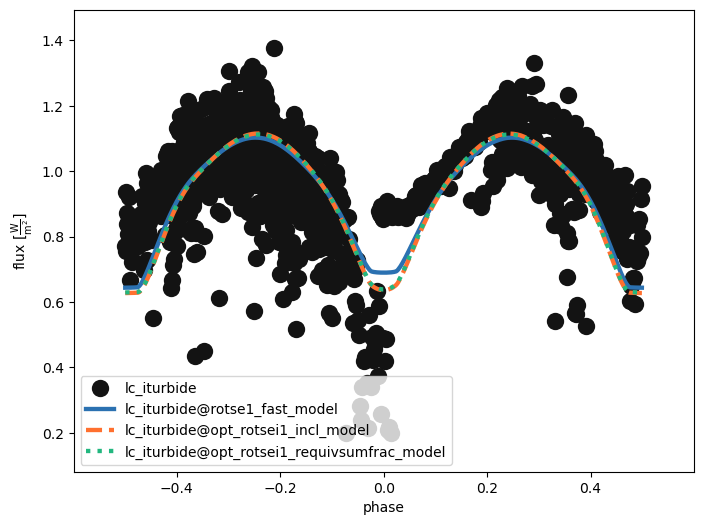

<Figure size 800x600 with 0 Axes>

In [28]:
b.plot(x='phase', dataset='lc_iturbide', show=True, legend=True)
gen_utils.animateMesh(b, logger)